In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast


df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")


#Data_Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Utilisateur\anaconda3\envs\python_again_vs_code\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# After successfully loading the data once
#df.to_csv("data_jobs.csv", index=False)

#Then next time you can simply do
#df = pd.read_csv("data_jobs.csv")

In [2]:
# What are the most common job titles?
df['job_title_short'].value_counts().head()

job_title_short
Data Analyst         196075
Data Engineer        186241
Data Scientist       172286
Business Analyst      49063
Software Engineer     44929
Name: count, dtype: int64

In [24]:
#Which countries have the highest number of job postings?
df['job_country'].value_counts().head()

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Name: count, dtype: int64

In [25]:
#How many remote jobs are available?
df['job_work_from_home'].value_counts()

#To show it as a percentage
df['job_work_from_home'].value_counts(normalize=True)*100

job_work_from_home
False    91.148228
True      8.851772
Name: proportion, dtype: float64

In [26]:
#What is the percentage of jobs that require a degree?
df['job_no_degree_mention'].value_counts(normalize=True) * 100

job_no_degree_mention
False    69.356824
True     30.643176
Name: proportion, dtype: float64

In [2]:
#What are the most frequent job skills mentioned overall?
#First, I need to explode the job_skills column — because each job posting contains 
# a list of skills (like ['python', 'sql', 'excel']), 
# and we want to count each skill individually.

df_exploded_skills = df.explode('job_skills')
df_exploded_skills





,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,NaN,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [3]:
# What are the most frequent job skills mentioned overall?
# Now, the counting
df_exploded_skills['job_skills'].value_counts().head()

job_skills
sql       384849
python    380909
aws       145381
azure     132527
r         130892
Name: count, dtype: int64

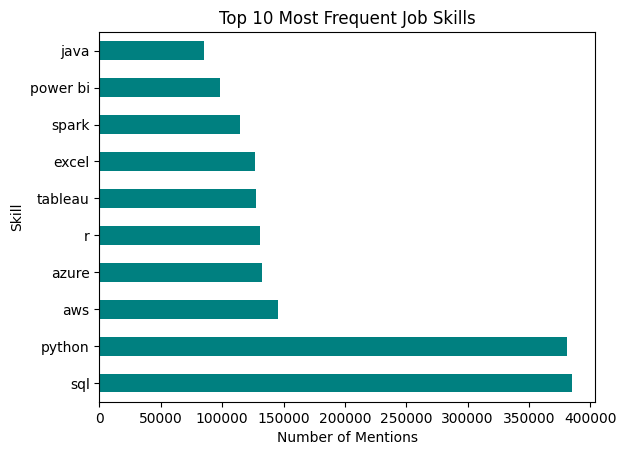

In [4]:
# What are the most frequent job skills mentioned overall?
# Visualiziting it

df_exploded_skills['job_skills'].value_counts().head(10).plot(kind='barh', color='teal')
plt.xlabel('Number of Mentions')
plt.ylabel('Skill')
plt.title('Top 10 Most Frequent Job Skills')
plt.show()


In [5]:
#What is the median yearly salary per job title?
df.groupby('job_title_short')['salary_year_avg'].median()

#Alternative code to make values easier to read
#It had to be turned to a dataframe for sorting
df.groupby('job_title_short', as_index=False)['salary_year_avg'].median().sort_values('salary_year_avg', ascending=False)



,job_title_short,salary_year_avg
8,Senior Data Scientist,155500.0
7,Senior Data Engineer,147500.0
4,Data Scientist,127500.0
3,Data Engineer,125000.0
6,Senior Data Analyst,111175.0
5,Machine Learning Engineer,106415.0
9,Software Engineer,99150.0
1,Cloud Engineer,90000.0
2,Data Analyst,90000.0
0,Business Analyst,85000.0


In [31]:
#Which country offers the highest median salary for Data Scientists?
#This code has to be writing in two simple parts

#Filter the dataset for only Data Scientists roles
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

#Then make the grouping and calculations
df_DS.groupby('job_country', as_index=False)['salary_year_avg'].median().sort_values('salary_year_avg', ascending=False)


,job_country,salary_year_avg
111,Russia,285000.0
33,Cyprus,191000.0
138,United Arab Emirates,166419.5
75,Luxembourg,157500.0
125,Sweden,157500.0
...,...,...
129,Tanzania,NaN
131,Togo,NaN
132,Trinidad and Tobago,NaN
141,Uruguay,NaN


In [13]:
# Replace NaN in salary_year_avg with column median
#It thought it would be better to replace with 0 but C said that median is a better choice
#because 0 would distort averages and create outliers
#Also medians are more realistic
#
#
#
#

#df['salary_year_avg'] = df['salary_year_avg'].fillna(df['salary_year_avg'].median())

#df['salary_year_filled'] = df['salary_year_avg'].fillna(df['salary_year_avg'].median())

#Setting new column in duplicated dataset
median_salary_year = df['salary_year_avg'].median()

median_salary_year
#df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(median_salary_year)

#Exp: In the column called salary_year_avg, replace every missing value (NaN) with the median 
# salary of the 'salary_year_avg' column.

np.float64(115000.0)

In [ ]:
#Just checking if the salary were still there
df['salary_year_avg'].value_counts().head(20)

salary_year_avg
90000.0     1070
115000.0     790
125000.0     786
150000.0     645
147500.0     641
157500.0     444
100000.0     435
140000.0     321
111175.0     321
89100.0      301
175000.0     299
110000.0     297
120000.0     284
79200.0      281
135000.0     261
105000.0     248
70000.0      246
130000.0     239
75000.0      235
80000.0      219
Name: count, dtype: int64

In [4]:
#Do remote jobs tend to pay more or less than non-remote ones?
#Can be resolved in 3 easy steps

#Filtering the dataset
df_remote_jobs = df[df['job_work_from_home'] == True]
df_non_remote_jobs = df[df['job_work_from_home'] == False]

#Calculating medians
remote_median = df_remote_jobs['salary_year_avg'].median()
non_remote_median = df_non_remote_jobs['salary_year_avg'].median()

#Printing results
print("Median salary for remote jobs :", remote_median )
print("Median salary for non remote jobs:", non_remote_median )

Median salary for remote jobs : 128829.625
Median salary for non remote jobs: 115000.0


In [6]:
#Do remote jobs tend to pay more or less than non-remote ones?
# Shorter code to solve the question using groupby
#I knew there was a simpler code

df.groupby('job_work_from_home')['salary_year_avg'].median()


job_work_from_home
False    115000.000
True     128829.625
Name: salary_year_avg, dtype: float64

In [32]:
# #Which skills are associated with above-average salaries?
#  Average salary per skill
skill_salary = df_exploded_skills.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False)


# Display top 10 skills by salary
print(skill_salary.head(10))


job_skills
debian          196500.0
ringcentral     182500.0
mongo           173500.0
lua             170500.0
hugging face    157500.0
dplyr           157500.0
haskell         157500.0
watson          157500.0
asp.net core    155000.0
solidity        152500.0
Name: salary_year_avg, dtype: float64


In [33]:
#Compare median salaries across experience levels or job types
df.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [34]:
#What are the top 10 skills most in-demand overall?
ten_top_skills = df_exploded_skills['job_skills'].value_counts().head(10)

ten_top_skills

job_skills
sql         384849
python      380909
aws         145381
azure       132527
r           130892
tableau     127213
excel       127018
spark       114609
power bi     98147
java         85612
Name: count, dtype: int64

In [7]:
#What are the top 10 skills for Data Analysts only?
DA_df = df_exploded_skills[df_exploded_skills['job_title_short'] == 'Data Analyst'].copy()

top_ten_skills_DA = DA_df['job_skills'].value_counts().head(10)

top_ten_skills_DA

job_skills
sql           92428
excel         66860
python        57190
tableau       46455
power bi      39380
r             29996
sas           27998
powerpoint    13822
word          13562
sap           11280
Name: count, dtype: int64

In [8]:
#Which skills appear most often in high-paying jobs?

#C's answer
# Filter high-paying jobs (over $80,000 per year)
high = df_exploded_skills[df_exploded_skills['salary_year_avg'] > 80000]

# Count the most frequent skills among those high-paying jobs
top_skills_highpay = (high['job_skills'].value_counts().head(20)    # top 20 skills
)

# Display results
top_skills_highpay


job_skills
python        11529
sql           11195
aws            4557
r              4433
tableau        4056
spark          3713
azure          3180
sas            2592
excel          2554
java           2510
snowflake      2324
hadoop         2066
power bi       2050
scala          1780
nosql          1533
kafka          1523
redshift       1426
airflow        1414
databricks     1407
git            1250
Name: count, dtype: int64

In [37]:
#Which skills appear most often in high-paying jobs?

#Rewriting the code

# Filter high-paying jobs (over $80,000 per year)

high = df_exploded_skills[df_exploded_skills['salary_year_avg'] > 80000]

#Then counting
high['job_skills'].value_counts().head(10)

job_skills
python     11529
sql        11195
aws         4557
r           4433
tableau     4056
spark       3713
azure       3180
sas         2592
excel       2554
java        2510
Name: count, dtype: int64

In [5]:
#Are there any skills that are uniquely required in certain countries?

#C's answer
# Assumes a dataframe named df_exploded_skills with columns: 'job_location' and 'job_skills'
# If your columns are named differently (e.g., 'company_location'), rename them first:
# df_exploded_skills = df_exploded_skills.rename(columns={'company_location': 'job_location'})



# 1) Find skills that occur in exactly ONE job_location
skill_country_counts = df_exploded_skills.groupby('job_skills')['job_location'].nunique()
unique_skills = skill_country_counts[skill_country_counts == 1].index

# 2) List those skills with their job_location
unique_skills_by_country = (
    df_exploded_skills[df_exploded_skills['job_skills'].isin(unique_skills)].drop_duplicates(['job_location', 'job_skills']).sort_values(['job_location', 'job_skills'])
)

print(unique_skills_by_country)



unique_skills_by_country.head(20)



          job_title_short                                          job_title  \
173565  Software Engineer                           Lead Full Stack Engineer   
87829        Data Analyst                         Real Property Data Analyst   
527970       Data Analyst    Associate Director, Forecasting& Data Analytics   
692294     Data Scientist  PhD Student (WiMi – Doktorand*In) in Computati...   
275388  Software Engineer                             Lead Software Engineer   
15951       Data Engineer                                      Data Engineer   
713642  Software Engineer                             Linux Systems Engineer   

                                  job_location          job_via  \
173565                                Anywhere  via Recruit.net   
87829                            Arlington, TX  via Trabajo.org   
527970                         Bannockburn, IL     via LinkedIn   
692294                         Berlin, Germany         via XING   
275388  San Juan, San Ju

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
173565,Software Engineer,Lead Full Stack Engineer,Anywhere,via Recruit.net,Full-time,True,Kenya,2023-02-08 23:45:18,False,False,Kenya,NaN,NaN,NaN,Software & Data,rubyon rails,"{'libraries': ['react'], 'programming': ['java..."
87829,Data Analyst,Real Property Data Analyst,"Arlington, TX",via Trabajo.org,Full-time,False,"Texas, United States",2023-05-28 00:00:48,False,False,United States,NaN,NaN,NaN,R&K Solutions,msaccess,"{'analyst_tools': ['ms access', 'excel', 'msac..."
527970,Data Analyst,"Associate Director, Forecasting& Data Analytics","Bannockburn, IL",via LinkedIn,Full-time,False,"Illinois, United States",2023-07-03 11:01:42,False,True,United States,NaN,NaN,NaN,Novartis Gene Therapies,gtx,"{'analyst_tools': ['qlik', 'tableau', 'power b..."
692294,Data Scientist,PhD Student (WiMi – Doktorand*In) in Computati...,"Berlin, Germany",via XING,Part-time,False,Germany,2023-12-08 10:20:37,False,False,Germany,NaN,NaN,NaN,Charite - Universitätsmedizin Berlin,wimi,"{'async': ['wimi'], 'other': ['github']}"
275388,Software Engineer,Lead Software Engineer,"San Juan, San Juan Province, Argentina",via BeBee,Full-time,False,Argentina,2023-10-12 08:11:21,False,False,Argentina,NaN,NaN,NaN,Emprego,visualbasic,"{'other': ['kubernetes', 'docker'], 'programmi..."
15951,Data Engineer,Data Engineer,"Stockholm, Sweden",via Jobbsafari,Full-time,False,Sweden,2023-12-22 13:15:37,True,False,Sweden,NaN,NaN,NaN,Oriental Century AB,dingtalk,"{'analyst_tools': ['excel'], 'async': ['dingta..."
713642,Software Engineer,Linux Systems Engineer,"Taguig, Metro Manila, Philippines",via BeBee,NaN,False,Philippines,2023-01-09 02:38:19,True,False,Philippines,NaN,NaN,NaN,Ubiquity,rocketchat,"{'async': ['confluence'], 'cloud': ['aws'], 'o..."


In [39]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [47]:
#Based on job postings, which skills should a new data analyst learn to be most employable?

DA_df_sk = df_exploded_skills[df_exploded_skills['job_title_short'] == 'Data Analyst']

DA_df['job_skills'].value_counts().head(10)

job_skills
sql           92428
excel         66860
python        57190
tableau       46455
power bi      39380
r             29996
sas           27998
powerpoint    13822
word          13562
sap           11280
Name: count, dtype: int64

In [6]:
#Which countries or regions would you target to find data jobs that pay best?
#My code is better and simpler

region = df.groupby('job_location')['salary_year_avg'].median().sort_values(ascending=False)

region.head(10)

job_location
Madison, SD                      960000.0
Pretoria, South Africa           890000.0
Belarus                          400000.0
Eagan, TN                        375000.0
Dodgeville, WI                   375000.0
Russia                           300000.0
Boston, NY                       300000.0
Liberty, NC                      250000.0
San Francisco, CA  (+1 other)    246509.0
Denver, NC                       240000.0
Name: salary_year_avg, dtype: float64

In [ ]:
#That is C's code
#Always doing the most...

# We'll use df (not exploded), since salaries are per job, not per skill

# 1️⃣ Keep only rows with salary data
df_salary = df.dropna(subset=['salary_year_avg'])

# 2️⃣ Group by location (country or region)
country_salary = (
    df_salary.groupby('job_location')['salary_year_avg']
    .median()                # median is better than mean for salaries
    .sort_values(ascending=False)
    .reset_index()
)

# 3️⃣ Display top 10 highest-paying countries
print(country_salary.head(10))


                    job_location  salary_year_avg
0                    Madison, SD         960000.0
1         Pretoria, South Africa         890000.0
2                        Belarus         400000.0
3                      Eagan, TN         375000.0
4                 Dodgeville, WI         375000.0
5                         Russia         300000.0
6                     Boston, NY         300000.0
7                    Liberty, NC         250000.0
8  San Francisco, CA  (+1 other)         246509.0
9                     Denver, NC         240000.0


In [ ]:
#Are there any gaps between demand and compensation (e.g., highly demanded but low-paying skills)?

#At first, I was not sure about how to answer the question. C said this
#Even though you don’t have candidate data, you can still answer this question based only on job postings
# by comparing how common each skill is vs how well it pays in the postings.
#What the question really means
#“Are there skills that employers ask for a lot, but jobs requiring them don’t pay as much?”
#You can measure that gap using job posting frequency (demand) and average salary (compensation) (for the psoting)

#So you’ll be looking for:

#High demand + Low pay → oversupplied skills (everyone has them, low salary leverage)

#Low demand + High pay → niche or advanced skills (harder to find, higher salary)



# 2️⃣ Group by skill: count postings (demand) and average salary
skill_summary = (
    df_exploded_skills.groupby('job_skills').agg(
        demand=('salary_year_avg', 'count'),       # how many postings mention this skill
        avg_salary=('salary_year_avg', 'median')   # median pay for postings with this skill
    ) #This technique is called named aggregation and is quite interesting. The classic way of doing it is : df.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']). But C said it gives generic names
    .reset_index()
)

# 3️⃣ Sort to see skills with high demand but low salary
skill_summary = skill_summary.sort_values('demand', ascending=False)

print(skill_summary.head(15))  # Top 15 most common skills



    job_skills  demand  avg_salary
204        sql   12951    120000.0
167     python   12869    125000.0
171          r    5088    119550.0
15         aws    4949    135000.0
217    tableau    4814    111175.0
199      spark    4016    140000.0
63       excel    3822     92500.0
16       azure    3466    125000.0
185        sas    3132    110000.0
97        java    2756    134241.0
160   power bi    2592    102000.0
197  snowflake    2455    135000.0
88      hadoop    2264    135000.0
187      scala    1905    147500.0
138      nosql    1677    138640.0


In [7]:
#Are there any gaps between demand and compensation (e.g., highly demanded but low-paying skills)?
#Rewriting previous code

skills_summary = df_exploded_skills.groupby('job_skills').agg(demand= ('salary_year_avg','count'), avg_salary= ('salary_year_avg','median')).reset_index()
skills_summary.sort_values('demand', ascending=False).head(15)

,job_skills,demand,avg_salary
204,sql,12951,120000.0
167,python,12869,125000.0
171,r,5088,119550.0
15,aws,4949,135000.0
217,tableau,4814,111175.0
199,spark,4016,140000.0
63,excel,3822,92500.0
16,azure,3466,125000.0
185,sas,3132,110000.0
97,java,2756,134241.0


In [ ]:
#Group the dataset by 'job_title_short' and count the number of postings per title.
df.groupby('job_title_short')['job_title_short'].count()

#This second code does the same thing too. It is way easier
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [13]:
#Sort the dataset by salary to find the top 10 highest-paying jobs.

df.sort_values('salary_year_avg', ascending=False).head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
554784,Data Scientist,Data Scientist,"Madison, SD",via Cooperative Career Center,Full-time,False,"Illinois, United States",2023-05-04 19:06:06,False,True,United States,year,960000.0,NaN,"East River Electric Power Cooperative, Inc.","[java, c++, python, r]","{'programming': ['java', 'c++', 'python', 'r']}"
665811,Senior Data Scientist,Senior Data Scientist,"Pretoria, South Africa",via Adzuna,Full-time,False,South Africa,2023-11-02 10:31:43,False,False,South Africa,year,890000.0,NaN,MSP Staffing LTD,"[python, sql, java, c#, databricks, azure, pys...","{'cloud': ['databricks', 'azure'], 'libraries'..."
168402,Data Analyst,Data Analyst,Anywhere,via Y Combinator,Full-time,True,India,2023-02-20 15:13:44,True,False,India,year,650000.0,NaN,Mantys,NaN,NaN
387378,Data Scientist,Geographic Information Systems Analyst - GIS A...,"New York, NY",via ZipRecruiter,Full-time,False,"New York, United States",2023-12-27 18:00:12,False,False,United States,year,585000.0,NaN,ReServe,[excel],{'analyst_tools': ['excel']}
160521,Data Scientist,Staff Data Scientist/Quant Researcher,Anywhere,via LinkedIn,Full-time,True,Sudan,2023-08-16 16:11:58,False,False,Sudan,year,550000.0,NaN,Selby Jennings,"[python, sql]","{'programming': ['python', 'sql']}"
404932,Data Engineer,Hybrid - Data Engineer - Up to $600k,"New York, NY",via LinkedIn,Full-time,False,"Florida, United States",2023-04-05 16:10:48,False,False,United States,year,525000.0,NaN,Durlston Partners,"[python, c++]","{'programming': ['python', 'c++']}"
554140,Data Scientist,Staff Data Scientist - Business Analytics,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-09-01 19:24:02,False,False,United States,year,525000.0,NaN,Selby Jennings,[sql],{'programming': ['sql']}
417241,Senior Data Scientist,Senior Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-01-31 16:03:46,False,False,United States,year,475000.0,NaN,Glocomms,NaN,NaN
618461,Senior Data Scientist,VP Data Science & Research,"Menlo Park, CA",via LinkedIn,Full-time,False,"California, United States",2023-11-08 12:23:39,False,False,United States,year,463500.0,NaN,WhatsApp,[go],{'programming': ['go']}
124265,Data Scientist,Data Scientist (L5) - Messaging,"Los Gatos, CA",via IT JobServe,Full-time,False,"California, United States",2023-08-17 08:04:09,False,False,United States,year,450000.0,NaN,Netflix,"[python, r, sql, spark, excel]","{'analyst_tools': ['excel'], 'libraries': ['sp..."


In [16]:
#Create a pivot table showing the median salary by job title and country

# Create a pivot table showing the median salary by job title and country
pivot_table = pd.pivot_table(
    df,
    values='salary_year_avg',        # what we want to summarize
    index='job_title_short',         # rows
    columns='job_location',      # columns
    aggfunc='median'                 # how we summarize (median salary)
)

# Optional: round values for clarity
pivot_table = pivot_table.round(0)

print(pivot_table)


job_location               A Coruña, Spain  Aarhus, Denmark  Abell, MD  \
job_title_short                                                          
Business Analyst                       NaN              NaN        NaN   
Cloud Engineer                     90976.0              NaN        NaN   
Data Analyst                           NaN          56700.0        NaN   
Data Engineer                          NaN              NaN        NaN   
Data Scientist                         NaN              NaN        NaN   
Machine Learning Engineer              NaN              NaN        NaN   
Senior Data Analyst                    NaN              NaN        NaN   
Senior Data Engineer                   NaN              NaN        NaN   
Senior Data Scientist                  NaN              NaN   166075.0   
Software Engineer                      NaN              NaN        NaN   

job_location               Aberdeen Proving Ground, MD  Aberdeen, MD  \
job_title_short                        

In [24]:
#Create a pivot table showing the median salary by job title and country

pivot_table = df.pivot_table(values = "salary_year_avg", index="job_title_short", columns='job_location', aggfunc='median')


# Drop rows that are entirely NaN
pivot_table = pivot_table.dropna(how='all') #To not consider cells that are empty and make the data cleaner

# Drop columns that are entirely NaN
pivot_table = pivot_table.dropna(axis=1, how='all')


pivot_table


job_location,"A Coruña, Spain","Aarhus, Denmark","Abell, MD","Aberdeen Proving Ground, MD","Aberdeen, MD","Aberdeen, UK","Abstatt, Germany",Abu Dhabi - United Arab Emirates,"Accokeek, MD","Addison, IL",...,"Zapopan, Jalisco, Mexico","Zaragoza, Spain","Zaventem, Belgium","Zoetermeer, Netherlands","Zuchwil, Switzerland","Zwolle, Netherlands","Zürich, Switzerland","Zürich, Switzerland (+1 other)","İstanbul, Türkiye","Łódź, Poland"
job_title_short,,,,,,,,,,,,,,,,,,,,,
Business Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cloud Engineer,90976.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data Analyst,NaN,56700.0,NaN,107500.0,60000.0,98500.0,111175.0,NaN,NaN,73750.0,...,111175.0,NaN,111175.0,NaN,51014.0,NaN,57100.00,NaN,57550.0,111175.0
Data Engineer,NaN,NaN,NaN,NaN,140000.0,NaN,111175.0,139216.0,NaN,120000.0,...,NaN,NaN,NaN,147500.0,NaN,98292.25,147500.00,NaN,122891.5,NaN
Data Scientist,NaN,NaN,NaN,160000.0,160000.0,NaN,NaN,NaN,145000.0,NaN,...,NaN,NaN,157500.0,NaN,NaN,NaN,131867.00,NaN,74600.0,NaN
Machine Learning Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89100.00,NaN,NaN,NaN
Senior Data Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98500.0,NaN
Senior Data Engineer,NaN,NaN,NaN,NaN,175000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,98283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Senior Data Scientist,NaN,NaN,166075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89100.00,NaN,64800.0,NaN


In [32]:
#Identify and drop rows where 'salary_year_avg' or 'job_skills' is missing

df_copy = df.dropna(subset=['salary_year_avg', 'job_skills']).copy()

df_copy


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,num_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"[gdpr, excel]","{'analyst_tools': ['excel'], 'libraries': ['gd...",2
77,Data Engineer,Data Engineer,"Arlington, Va",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"[mongodb, mongodb, python, r, sql, mysql, mari...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",11
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}",2
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, Ca",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr...",4
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, Fl",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea...",11
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, Il",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",10
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, Ca",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':...",4
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"[python, hadoop, spark, airflow, kubernetes]","{'libraries': ['hadoop', 'spark', 'airflow'], ...",5


In [ ]:
#Checking something on the df_copy dataframe

print(df.shape)  # before and after to compare number of rows

#This code does not seem to work


(785741, 17)


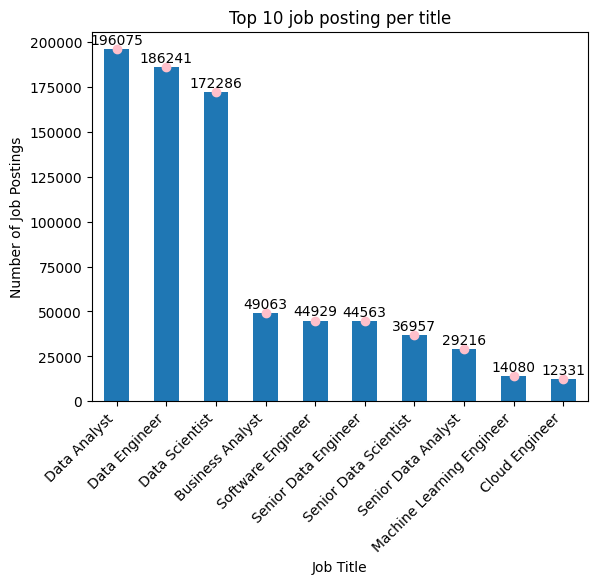

In [37]:
#Plot the top 10 job titles by posting count using Matplotlib

import matplotlib.pyplot as plt

top_ten_titles = df['job_title_short'].value_counts().sort_values(ascending=False)

top_ten_titles.plot(kind='bar')
plt.title('Top 10 job posting per title')
plt.ylabel('Number of Job Postings')
plt.xlabel('Job Title')
plt.xticks(rotation=45, ha='right')  # make labels readable

# Add exact values (dots + labels) on top of bars
for i, value in enumerate(top_ten_titles):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom', fontsize=10, fontweight='light')  
    plt.plot(i, value, 'o', color='pink')  # small pink dot on top of each bar

plt.show()



In [ ]:
#. Use .apply() and lambda to count the number of skills listed per job.
#Just checking the data type of the job_skills column

df.info() #This allows to check more general info about the entire dataset

#A more straightforward option is 

print(df['job_skills'].dtype)



object


In [15]:
#. Use .apply() and lambda to count the number of skills listed per job.

df['num_skills'] = df['job_skills'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

print(df[['job_skills', 'num_skills']].head(10))



                                          job_skills  num_skills
0                                                NaN           0
1         [r, python, sql, nosql, power bi, tableau]           6
2  [python, sql, c#, azure, airflow, dax, docker,...           9
3  [python, c++, java, matlab, aws, tensorflow, k...           8
4  [bash, python, oracle, aws, ansible, puppet, j...           9
5                                 [python, sql, gcp]           3
6  [sql, python, java, sql server, gcp, bigquery,...           7
7  [sql, nosql, gcp, azure, aws, bigquery, databr...          11
8                      [excel, powerpoint, power bi]           3
9  [sql, python, r, mongodb, mongodb, sql server,...          11


In [ ]:
#Rewriting the code
#Nailed it

df['num_skills'] = df['job_skills'].apply(lambda x: len(x) if isinstance(x,list) else 0)

print(df[['job_skills','num_skills']].head(10))

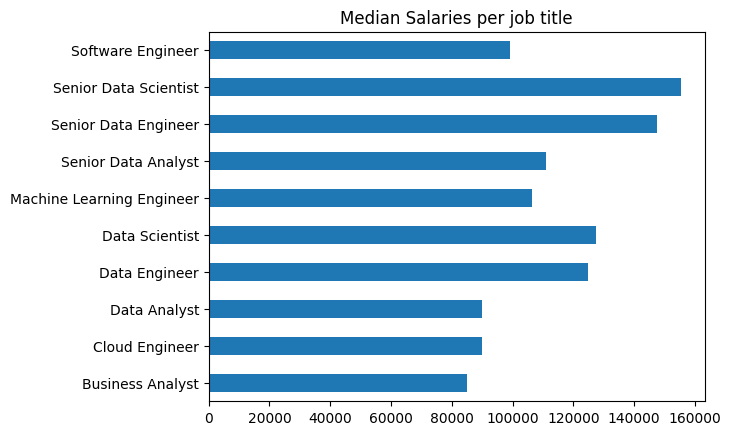

In [ ]:
#Visualize the median salary per job title using a horizontal bar chart.
#Nailed it

median_salaries = df.groupby('job_title_short')['salary_year_avg'].median()

median_salaries.plot(kind='barh')
plt.title('Median Salaries per job title')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [10]:
#importing seaborn
import seaborn as sns

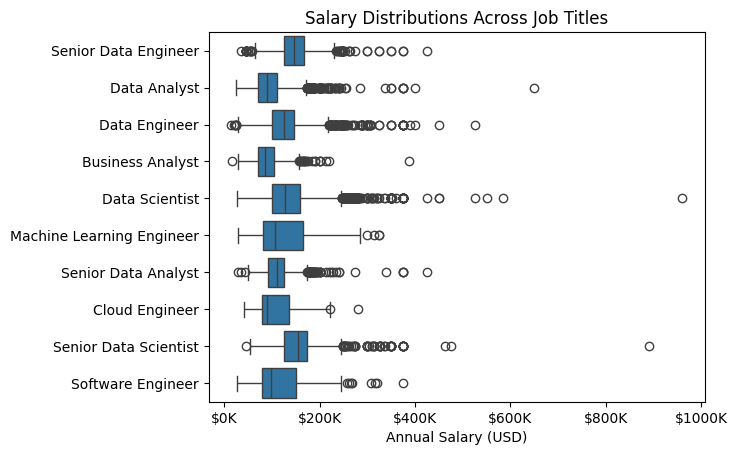

In [ ]:
#Create a boxplot comparing salary distributions across job titles (use Seaborn).
#Easier than I expected


sns.boxplot(data= df, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distributions Across Job Titles')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()




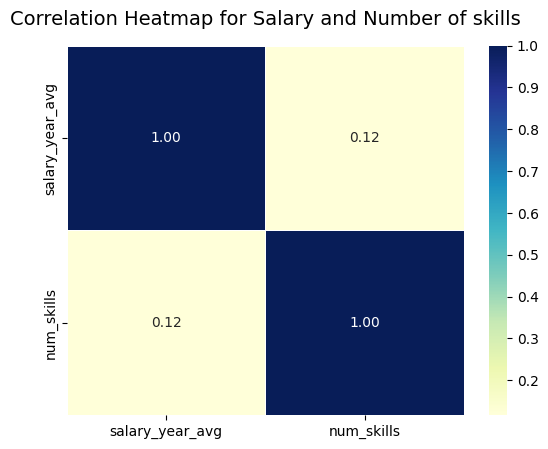

In [18]:
# Find correlations between numerical columns (salary, years of experience, etc.) and plot a heatmap
#C's answer

# Compute correlation matrix
corr = df[['salary_year_avg', 'num_skills']].corr()

# 3️⃣ Plot correlation heatmap
plt.figure()
sns.heatmap( corr, annot=True,fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap for Salary and Number of skills", fontsize=14, pad=15)
plt.show()


In [27]:
df['job_location'] = df['job_location'].astype(str).str.strip().str.title()

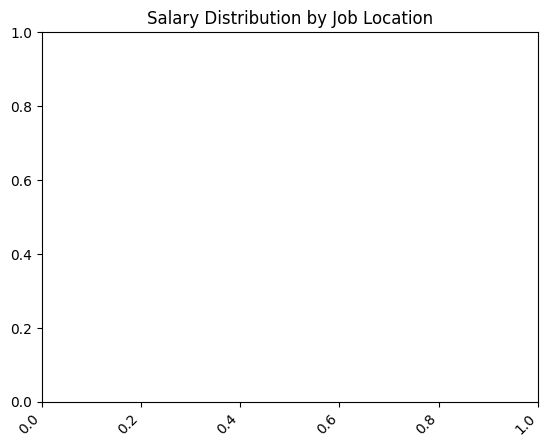

In [ ]:
#Checking how salaries vary accross locations
#C said using a boxplot was the best visualisation tool to visualise this

#I tried visualising per location but since the locations are very detailled and not uniform, pandas return
# empty values
# "When locations look like “Berlin, Germany”, “Munich, Germany”, “Stockholm, Sweden”, etc., pandas treats each of those as different unique values,
#  even though they refer to the same country."

df['job_location'] = df['job_location'].astype(str).str.strip().str.title()

top_locations = df['job_location'].value_counts().sort_values(ascending=False).head(10)
location = df[df['job_location'].isin(top_locations)]


plt.figure()
sns.boxplot(data=location, x='job_location', y='salary_year_avg')
plt.xticks(rotation=45, ha='right')
plt.title('Salary Distribution by Job Location')
plt.show()


In [ ]:
#Checking how salaries vary accross locations specifically accross countries
#To be able to perform this, I have to first normalize the job_location column. Will get back to it later

In [ ]:
#

df['job_location']

0                   Watertown, CT
1    Guadalajara, Jalisco, Mexico
2                 Berlin, Germany
3                 San Antonio, TX
4                  Washington, DC
5                        Anywhere
6                    Dearborn, MI
7                        Anywhere
8             Copenhagen, Denmark
9                        Anywhere
Name: job_location, dtype: object

In [33]:
#How to export a cleaned dataset to a csv file for later use

df_copy.to_csv('data_jobs_data/cleaned_jobs_data.csv', index=False)


OSError: Cannot save file into a non-existent directory: 'data_jobs_data'

In [34]:
#How many rows and columns are in the dataset?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           785741 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa